In [13]:
import numpy as np
import pandas as pd
import pyreadr
import datetime
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [2]:
# define paths
data_path = '/Users/simonneumeyer/Dropbox/Ethiopia IE - Road Safety/Data/'
crashes_path = 'ETRE - Crashes/'
crash_file = 'FinalData/crashes.csv'
traffic_path = 'ETRE - Traffic/'
traffic_file = 'FinalData/traffic.pq'
precipitation_path = 'Precipitation/'
precipitation_file = 'FinalData/precipitation.csv'

In [3]:
segment_time = pd.read_parquet(data_path + 'Time Segment Data/segment_time_panel.pq', engine='pyarrow')

In [5]:
segment_time[['total_weight', 'speed_km_hr', 
        'veh_type_1', 'veh_type_2', 'veh_type_3', 'veh_type_4', 'veh_type_5', 'veh_type_6', 'veh_type_7', 
        'speed_sec_km']] = segment_time[['total_weight', 'speed_km_hr', 
        'veh_type_1', 'veh_type_2', 'veh_type_3', 'veh_type_4', 'veh_type_5', 'veh_type_6', 'veh_type_7', 
        'speed_sec_km']].fillna(0)

# crash types:

In [ ]:
cols = ['k_cars', 'weekend', 
        'holiday', 'holiday_plusminus_2day', 'speed_p90', 'rush_hour_dummy', 'total_weight', 
        'veh_type_1', 'veh_type_3', 'veh_type_4', 'veh_type_5', 'veh_type_6', 'veh_type_7', 
        'speed_sec_km', 'midnight_dummy', 
        'rain_seg_1', 'rain_seg_2', 'rain_seg_3', 'rain_seg_4', 'rain_seg_5', 'rain_seg_6']

## Regression:

### Logistic Regression:

In [7]:
segment_time.type_of_accident_simple.value_counts()

overthrow                                        204
crash                                            102
crash with gaurdrail                              95
crushed with poperty                              71
vehicle to vehicle crash                          56
crash, other                                      41
front back crushed                                35
nan                                               34
other                                              6
['crushed with poperty' 'front back crushed']      3
['front back crushed' 'overthrow']                 3
['front back crushed' 'nan']                       2
['crash' 'vehicle to vehicle crash']               2
['crash' 'front back crushed']                     2
['nan' 'vehicle to vehicle crash']                 2
['crash' 'overthrow']                              1
['crash, other' 'other' 'overthrow']               1
['crash, other' 'front back crushed']              1
['crash, other' 'nan']                        

overthrow
0.0    3931634
1.0        211
Name: accidents, dtype: int64


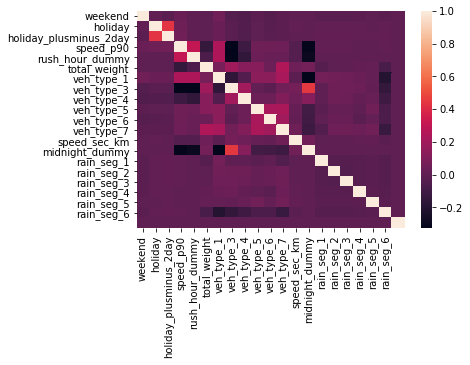



crash
0.0    3931634
1.0        109
Name: accidents, dtype: int64


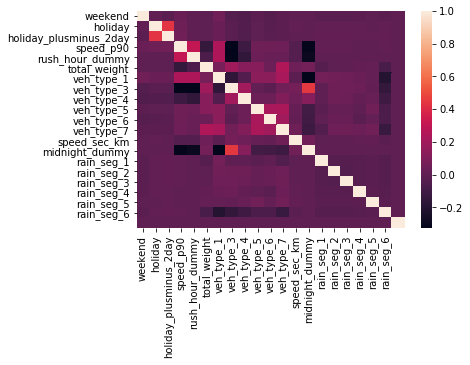



crash with gaurdrail
0.0    3931634
1.0        102
Name: accidents, dtype: int64


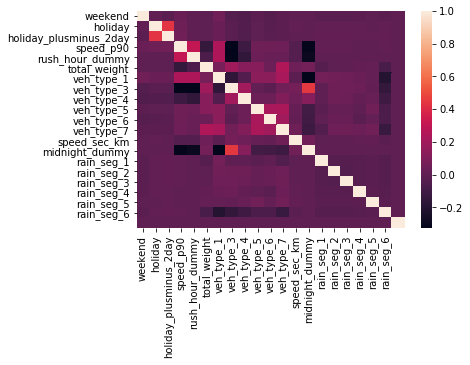



crushed with poperty
0.0    3931634
1.0         78
Name: accidents, dtype: int64


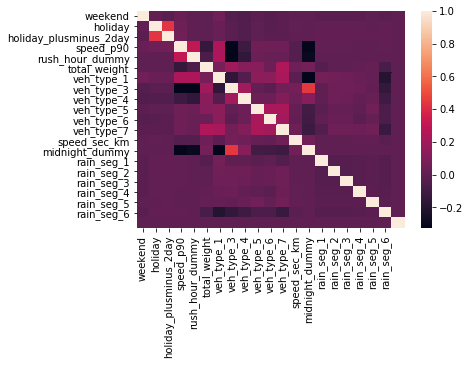



vehicle to vehicle crash
0.0    3931634
1.0         63
Name: accidents, dtype: int64


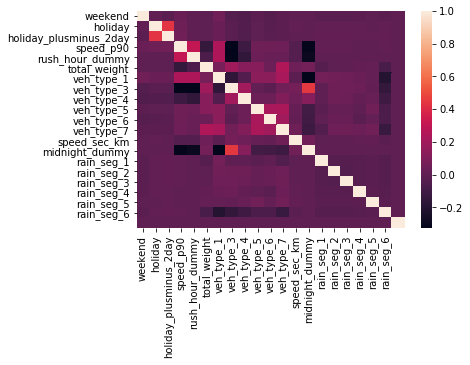



crash, other
0.0    3931634
1.0         48
Name: accidents, dtype: int64


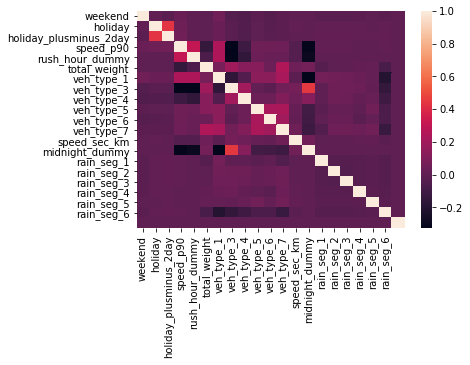



front back crushed
0.0    3931634
1.0         42
Name: accidents, dtype: int64


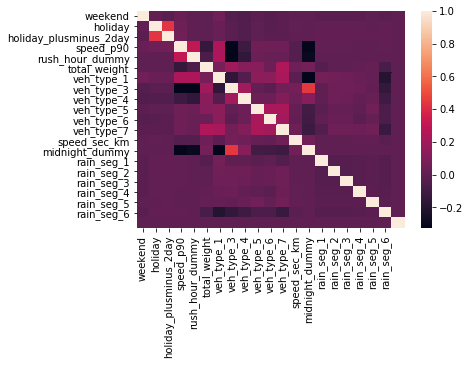

In [30]:
def corr_matrix(data):    
    # dropping NAs where we don't have speed_mean (only 8k observations)
    df = data.dropna(subset=['speed_mean']).reset_index()
    y = df.accidents
    X = df[cols]
    # model
    corr = np.corrcoef(pd.concat([X, y], axis=1).T[1:])
    sns.heatmap(corr, xticklabels=X.columns[1:], yticklabels=X.columns[1:])
    plt.show()
    #print(sm_model.pvalues)

for crash in crash_types:
    cond_1 = segment_time.type_of_accident_simple == crash
    cond_2 = segment_time.type_of_accident_simple.isnull()
    subset = segment_time[cond_1 | cond_2]
    print(crash)
    print(subset.accidents.value_counts())
    corr_matrix(subset)
    # check for correlation between covariates:
    print('\n')

In [8]:
def log_reg(data):    
    # dropping NAs where we don't have speed_mean (only 8k observations)
    df = data.dropna(subset=['speed_mean']).reset_index()
    y = df.accidents
    X = df[cols]
    # model
    sm_model = sm.Logit(y, sm.add_constant(X)).fit(disp=0)
    #print(sm_model.pvalues)
    return sm_model.summary()

# subset for only frequent crash types:
crash_types = segment_time.type_of_accident_simple.value_counts().index[:7]

for crash in crash_types:
    cond_1 = segment_time.type_of_accident_simple == crash
    cond_2 = segment_time.type_of_accident_simple.isnull()
    subset = segment_time[cond_1 | cond_2]
    print(crash)
    print(log_reg(subset))
    print('\n')

overthrow
                           Logit Regression Results                           
Dep. Variable:              accidents   No. Observations:              3926394
Model:                          Logit   Df Residuals:                  3926372
Method:                           MLE   Df Model:                           21
Date:                Tue, 25 May 2021   Pseudo R-squ.:                 0.02192
Time:                        02:58:25   Log-Likelihood:                -2235.3
converged:                       True   LL-Null:                       -2285.4
Covariance Type:            nonrobust   LLR p-value:                 2.659e-12
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -12.2071      0.516    -23.665      0.000     -13.218     -11.196
k_cars                     0.6704      0.428      1.566      0.117      -0.169       

/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:              accidents   No. Observations:              3926292
Model:                          Logit   Df Residuals:                  3926270
Method:                           MLE   Df Model:                           21
Date:                Tue, 25 May 2021   Pseudo R-squ.:                 0.04802
Time:                        03:00:05   Log-Likelihood:                -1192.5
converged:                      False   LL-Null:                       -1252.6
Covariance Type:            nonrobust   LLR p-value:                 6.272e-16
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15.3751      1.236    -12.444      0.000     -17.797     -12.954
k_cars                     0.8565      0.559      1.531      0.126      -0.240       1.953
week

/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:              accidents   No. Observations:              3926261
Model:                          Logit   Df Residuals:                  3926239
Method:                           MLE   Df Model:                           21
Date:                Tue, 25 May 2021   Pseudo R-squ.:                 0.07951
Time:                        03:03:11   Log-Likelihood:                -849.12
converged:                      False   LL-Null:                       -922.47
Covariance Type:            nonrobust   LLR p-value:                 7.431e-21
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -13.0227      1.025    -12.700      0.000     -15.032     -11.013
k_cars                     2.9875      0.498      6.003      0.000       2.012       3.963
week

/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

### Random Forest:

In [15]:
def rf(data):
    df = data.dropna(subset=['speed_mean']).reset_index()
    y = df.accidents
    X = df[cols]

    rf = RandomForestRegressor(max_depth=2, random_state=0)
    rf.fit(X, y)
    
    plt.figure(figsize=(15,8))
    sns.barplot(x=X.columns, y=rf.feature_importances_)
    plt.xticks(rotation=60)
    plt.show()

overthrow


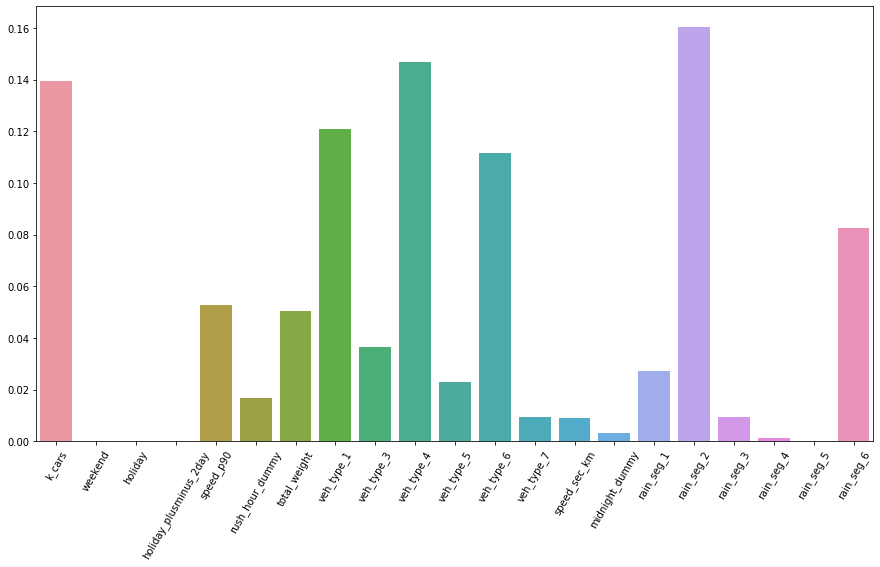

None


crash


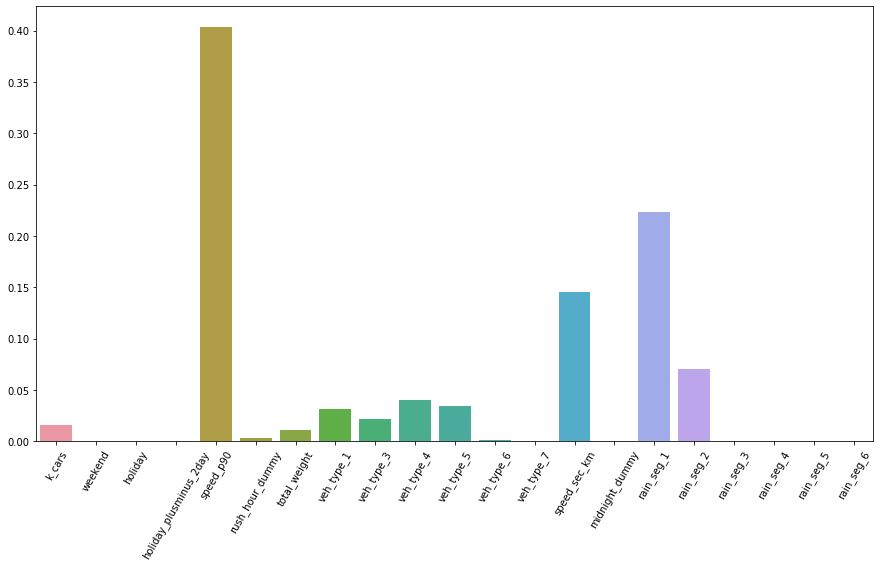

None


crash with gaurdrail


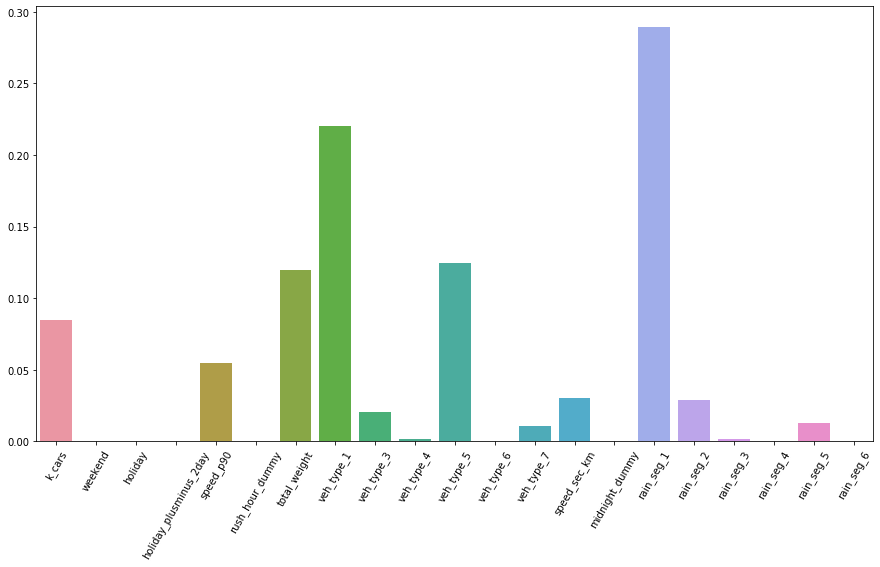

None


crushed with poperty


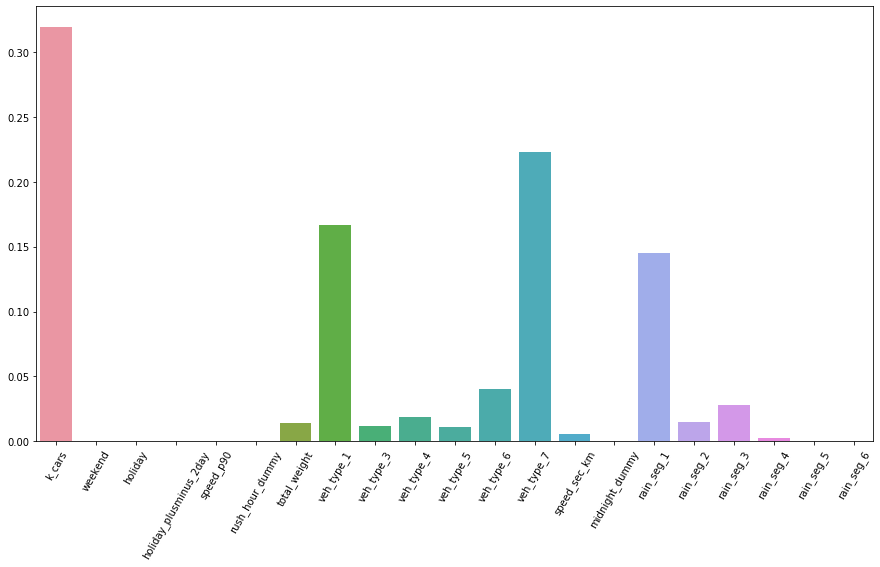

None


vehicle to vehicle crash


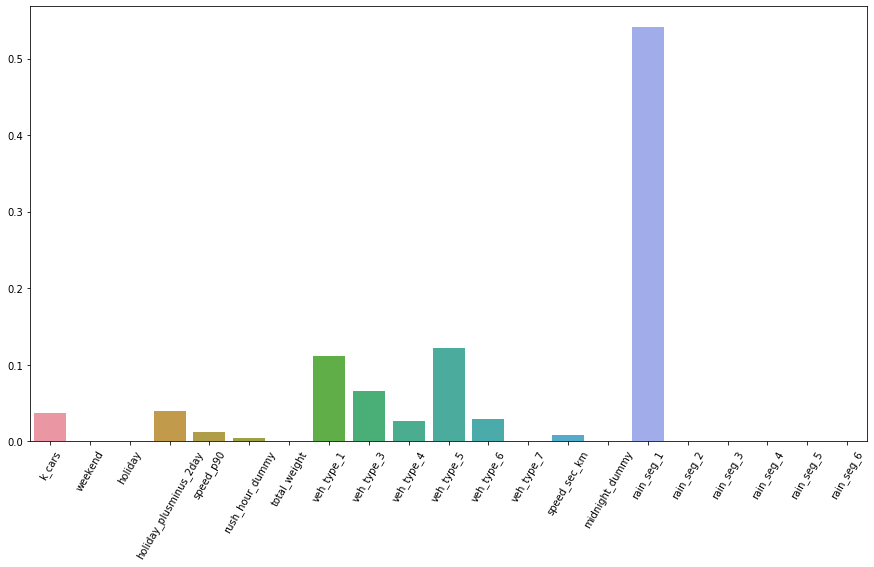

None


crash, other


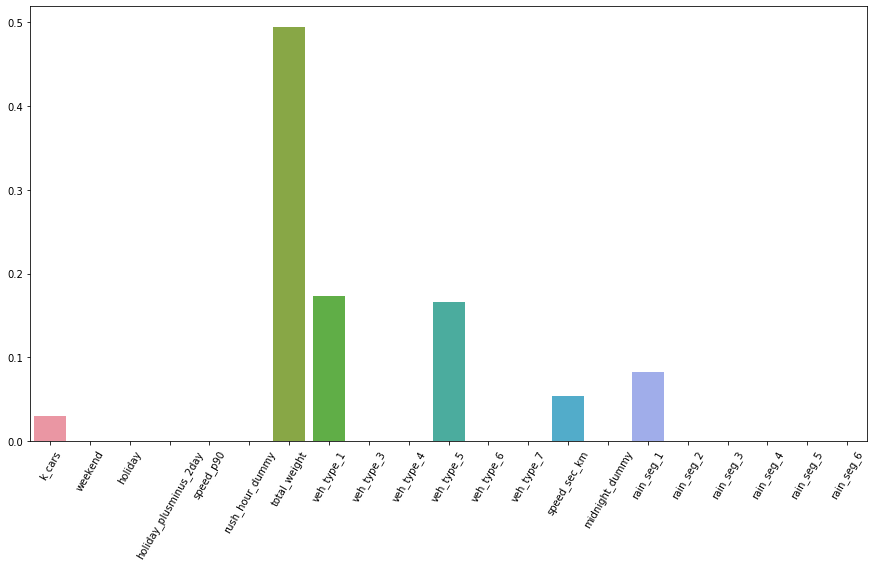

None


front back crushed


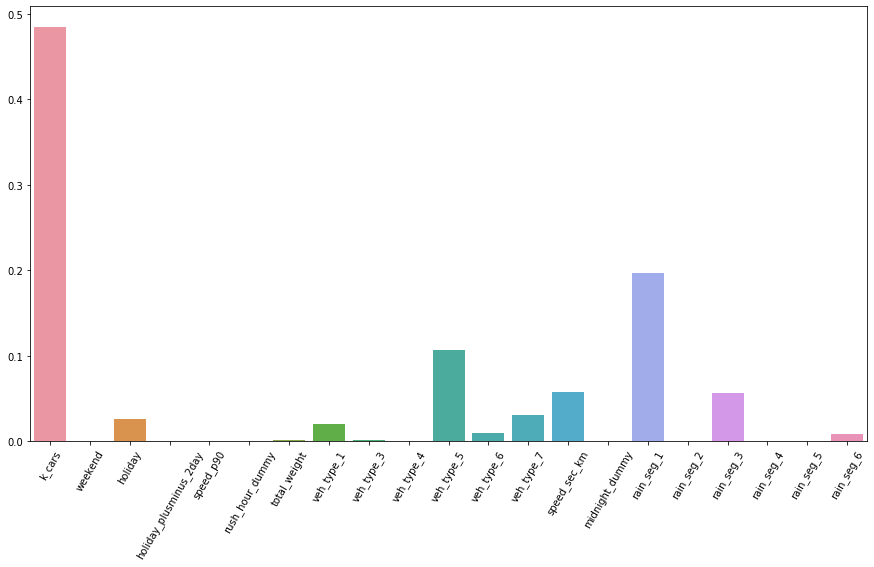

None


CPU times: user 59min 19s, sys: 2min 20s, total: 1h 1min 40s
Wall time: 1h 43min 43s


In [16]:
%%time
for crash in crash_types:
    cond_1 = segment_time.type_of_accident_simple == crash
    cond_2 = segment_time.type_of_accident_simple.isnull()
    subset = segment_time[cond_1 | cond_2]
    print(crash)
    print(rf(subset))
    print('\n')

# At hourly level:

In [44]:
%%time
wm = lambda x: np.average(x, weights=segment_time.loc[x.index, "k_cars"]+1)

hourly = segment_time.groupby(['date','hour']).agg(
    accidents = ('accidents', 'max'), k_cars = ('k_cars', 'sum'), weekend = ('weekend', 'mean'), 
    holiday = ('holiday', 'mean'), holiday_plusminus_2day = ('holiday_plusminus_2day', 'mean'), 
    speed_p90 = ('speed_p90', wm), rush_hour_dummy = ('rush_hour_dummy', 'mean'), 
    total_weight = ('total_weight', wm), veh_type_1 = ('veh_type_1', wm), veh_type_3 = ('veh_type_3', wm),
    veh_type_4 = ('veh_type_4', wm), veh_type_5 = ('veh_type_5', wm), veh_type_6 = ('veh_type_6', wm), 
    veh_type_7 = ('veh_type_7', wm), speed_sec_km = ('speed_sec_km', wm), 
    midnight_dummy = ('midnight_dummy', 'mean')
).reset_index()

CPU times: user 2min 14s, sys: 710 ms, total: 2min 15s
Wall time: 2min 16s


In [46]:
cols = ['k_cars', 'weekend', 
        'holiday', 'holiday_plusminus_2day', 'speed_p90', 'rush_hour_dummy', 'total_weight', 
        'veh_type_1', 'veh_type_3', 'veh_type_4', 'veh_type_5', 'veh_type_6', 'veh_type_7', 
        'speed_sec_km', 'midnight_dummy'
       ]

## OLS

In [49]:
# OLS model:

# dropping NAs where we don't have speed_mean (only 8k observations)
df = hourly.dropna(subset=['speed_p90']).reset_index()

y = df.accidents

X = df[cols]
X = sm.add_constant(X)

# Fit and summarize OLS model
model = sm.OLS(y, X)

linreg = model.fit()
#linreg = model.fit(cov_type='cluster', cov_kwds={'groups': groups})

print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:              accidents   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     13.16
Date:                Thu, 27 May 2021   Prob (F-statistic):           9.89e-34
Time:                        15:09:11   Log-Likelihood:                 10592.
No. Observations:               24853   AIC:                        -2.115e+04
Df Residuals:                   24837   BIC:                        -2.102e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

## Logit

In [53]:
# dropping NAs where we don't have speed_mean (only 8k observations)
df = segment_time.dropna(subset=['speed_mean']).reset_index()
y = df.accidents
X = df[cols]

import statsmodels.api as sm
sm_model = sm.Logit(y, sm.add_constant(X)).fit(disp=0)
#print(sm_model.pvalues)
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              accidents   No. Observations:              3926853
Model:                          Logit   Df Residuals:                  3926837
Method:                           MLE   Df Model:                           15
Date:                Thu, 27 May 2021   Pseudo R-squ.:                 0.03041
Time:                        15:18:57   Log-Likelihood:                -6285.8
converged:                       True   LL-Null:                       -6482.9
Covariance Type:            nonrobust   LLR p-value:                 1.120e-74
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -11.2449      0.324    -34.704      0.000     -11.880     -10.610
k_cars                     1.7822      0.205      8.678      0.000       1.380       2.185
weekend                    0.0582      0.078      0.742      0.458      -0.095       0.212
holiday                   -0.2513      0.252     -0.996      0.319      -0.746       0.243
holiday_plusminus_2day     0.1501      0.112      1.335      0.182      -0.070       0.370
speed_p90                  0.0033      0.002      1.499      0.134      -0.001       0.008
rush_hour_dummy            0.7893      0.096      8.249      0.000       0.602       0.977
total_weight           -1.392e-05   1.14e-05     -1.224      0.221   -3.62e-05    8.38e-06
veh_type_1                 2.0699      0.319      6.496      0.000       1.445       2.694
veh_type_3                 1.8286      0.278      6.573      0.000       1.283       2.374
veh_type_4                 1.6743      0.412      4.064      0.000       0.867       2.482
veh_type_5                 0.8024      2.136      0.376      0.707      -3.385       4.990
veh_type_6                 1.0852      2.663      0.407      0.684      -4.134       6.305
veh_type_7                 0.7057      0.659      1.070      0.285      -0.587       1.998
speed_sec_km              -0.0024      0.003     -0.939      0.348      -0.007       0.003
midnight_dummy             0.8180      0.147      5.555      0.000       0.529       1.107
==========================================================================================

Possibly complete quasi-separation: A fraction 0.33 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Random Forest:

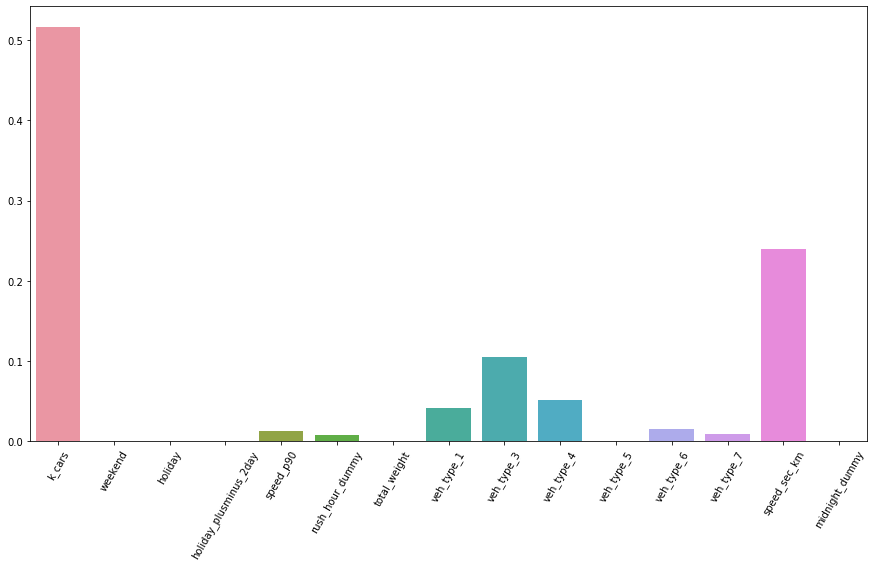

In [54]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

plt.figure(figsize=(15,8))
sns.barplot(x=X.columns, y=regr.feature_importances_)
plt.xticks(rotation=60)
plt.show()